In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [11]:
df=pd.read_csv("telecom_churn_data.csv")
df.drop("CustomerID",axis=1,inplace=True)
df

,Tenure,MonthlyCharges,TotalCharges,ContractType,TechSupport,StreamingTV,PaymentMethod,Churn
0,52,47.22,7819.68,One year,Yes,Yes,Mailed check,0
1,15,41.25,3314.57,One year,No,No,Bank transfer,0
2,72,43.06,6978.95,Month-to-month,Yes,No,Credit card,1
3,61,49.96,6280.85,One year,No,Yes,Mailed check,0
4,21,42.14,4579.43,Month-to-month,No,Yes,Bank transfer,0
...,...,...,...,...,...,...,...,...
795,53,75.59,4855.20,Month-to-month,No,No,Mailed check,0
796,22,37.46,7150.93,One year,Yes,Yes,Mailed check,0
797,21,76.05,3602.70,One year,Yes,No,Mailed check,0
798,70,99.96,4896.01,One year,Yes,No,Mailed check,1


In [12]:
label=LabelEncoder()
for i in df.select_dtypes(include="object"):
    df[i]=label.fit_transform(df[i])

In [13]:
x=df.drop("Churn",axis=1)
y=df["Churn"]

In [14]:
scalar=StandardScaler()
x_scalar=scalar.fit_transform(x)
x_scalar

array([[ 0.58029025, -0.86866049,  1.64927912, ...,  1.19649945,
         1.01257911,  1.242038  ],
       [-1.05153488, -1.15854174, -0.34219729, ..., -0.83577138,
        -0.98757716, -1.42901146],
       [ 1.46235788, -1.07065479,  1.27763582, ...,  1.19649945,
        -0.98757716, -0.53866164],
       ...,
       [-0.78691459,  0.53121832, -0.2148299 , ...,  1.19649945,
        -0.98757716,  1.242038  ],
       [ 1.37415112,  1.69220001,  0.35687565, ...,  1.19649945,
        -0.98757716,  1.242038  ],
       [ 1.37415112, -1.54116557,  0.44144833, ...,  1.19649945,
        -0.98757716,  0.35168818]], shape=(800, 7))

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x_scalar,y,test_size=0.2,random_state=42)

In [16]:
model=KNeighborsClassifier(n_neighbors=8)
model.fit(x_train,y_train)

,n_neighbors,8
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [17]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [18]:
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.68125

In [19]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[106,  47],
       [  4,   3]])

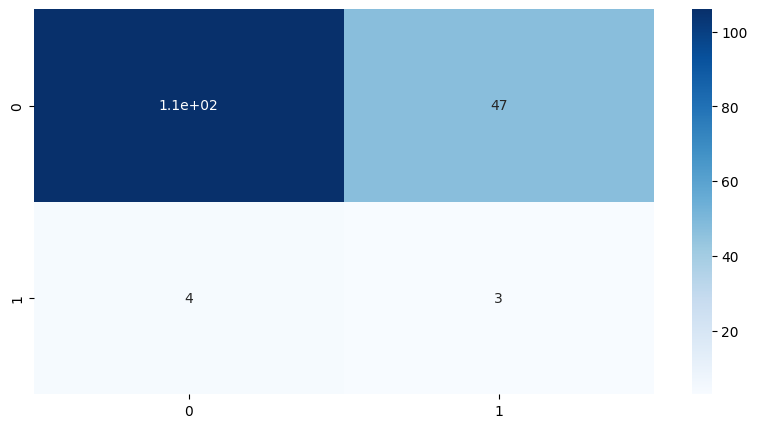

In [20]:
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True,cmap="Blues")
plt.show()